## Computer Vision Project - Group 10
#### Daniel Astorino 260799820
#### Murray Kornelsen 260714814
#### Julianna Tchebotareva 260761726
#### Tyler Young 260730324 

In [1]:
# import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

from sklearn.linear_model import SGDClassifier
import sklearn.metrics #confusion_matrix, accuracy_score, precision_score, recall_score
import csv
import pandas as pd
from sklearn.utils import shuffle
from skimage.feature import hog as hog_sklearn

In [2]:
class_trainingimgs = []
fileNames = glob.glob("./flower_classification/training/*.jpg")

for i in fileNames:
    #print(i)
    image = cv2.imread(i)
    class_trainingimgs.append(image)

#this takes some time to import all 6000 photos

In [3]:
# we will resize the 6000 images or else it will be tedious to work with

resizeClassification = []

for i in class_trainingimgs:

    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(i, (128, 128),interpolation=cv2.INTER_AREA)
    resizeClassification.append(pic)
    #plt.figure()
    #plt.imshow(pic)
    #plt.show()

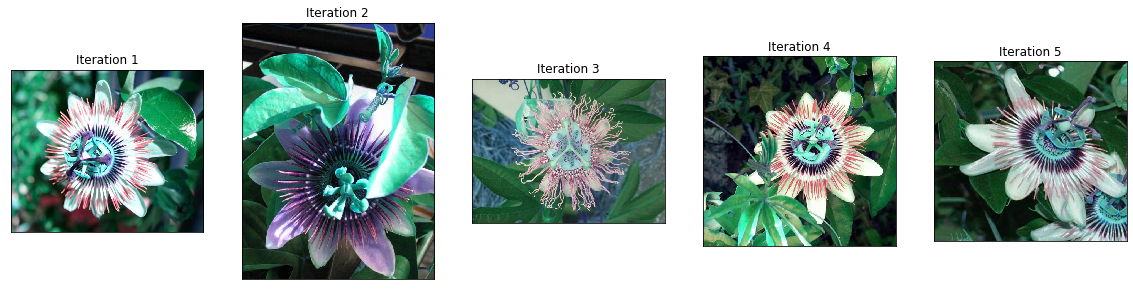

In [4]:
#function to plot 5 images at a time
def plot(segImgs):    
    plt.figure(figsize=(20,20))
    for i in range(5):
        plt.subplot(151 + i)
        plt.imshow(segImgs[i])
        plt.title("Iteration " + str(i+1)), plt.xticks([]), plt.yticks([])
        


plot(class_trainingimgs)

In [5]:
# now to want to perform feature extraction for the resized images

# we will make a copy of the array  
classificationPhotos = resizeClassification.copy()

allKeypoints = []
allDescriptors = []

for img in classificationPhotos:

    # create a SIFT object
    sift_obj = cv2.xfeatures2d.SIFT_create()

    # Compute keypoints and descriptors
    keypoints, descriptors = sift_obj.detectAndCompute(img ,None)
    
    allKeypoints.append(keypoints)
    allDescriptors.append(descriptors)

# we will find the SIFT features for each and keep only the good features
# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))
print('Num keypoints: '+ str(len(allKeypoints)))
print('Num descriptors: '+ str(len(descriptors)))
print('Num descriptors: '+ str(len(allDescriptors)))

Num keypoints: 133
Num keypoints: 6000
Num descriptors: 133
Num descriptors: 6000


train a Support Vector Machine (SVM) classifier using your computed features and the ground truth labels. Optimize the hyperparame- ters (e.g., number of features, thresholds, SVM kernel, etc.) for the feature extraction stage and for the SVM classifier. Repeat using a different (non-deep learning) classifier of your choice.

# SVM Trained with HoG

In [36]:
print(len(classificationPhotos))

svm = SGDClassifier(penalty='l2')
print(svm)

6000
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [37]:
def HoG_optimization():
    
    for bins in range(4,9):
        for cell in range(3,5):
            for block in range(3,5):
                
                if result > best_result:
                    best_result  = result
                    best_parameters = [bins, cell, block]
                
    

In [38]:
#Find the HoG

def hog(img, cell_size=4, block_size=5, nbins=8):
    
#     img = cv2.cvtColor(img,
#                        cv2.COLOR_BGR2GRAY)

#     cell_size = (2, 2)  # h x w in pixels
#     block_size = (2, 2)  # h x w in cells
#     nbins = 9  # number of orientation bins

#     # create HoG Object
#     # winSize is the size of the image cropped to multiple of the cell size
#     # all arguments should be given in terms of number of pixels
#     hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
#                                       img.shape[0] // cell_size[0] * cell_size[0]),
#                             _blockSize=(block_size[1] * cell_size[1],
#                                         block_size[0] * cell_size[0]),
#                             _blockStride=(cell_size[1], cell_size[0]),
#                             _cellSize=(cell_size[1], cell_size[0]),
#                             _nbins=nbins)

#     n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

#     # Compute HoG features
#     hog_feats = hog.compute(img) \
#                    .reshape(n_cells[1] - block_size[1] + 1,
#                             n_cells[0] - block_size[0] + 1,
#                             block_size[1], block_size[0], nbins) \
#                    .transpose((1, 0, 3, 2, 4))  # index blocks by rows first


    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    fd = hog_sklearn(img_g, orientations=nbins,
                            pixels_per_cell = (cell_size, cell_size),
                            cells_per_block=(block_size, block_size),
                            block_norm='L1', 
                            multichannel=False,
                            feature_vector=True, 
                            visualize=False)
    return fd
    
#     # Preview
#     plt.figure(figsize = (20,100))
#     plt.subplot(151)
#     plt.imshow(img, cmap='gray')
#     plt.title("Original Image"), plt.xticks([]), plt.yticks([])

#     plt.subplot(152)
#     plt.pcolor(hog_feats[:, :, 0,0,0])
#     plt.gca().invert_yaxis()
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.title("HOG bin = 0, block = 1"), plt.xticks([]), plt.yticks([])

#     plt.subplot(153)
#     plt.pcolor(hog_feats[:, :, 0,1,0])
#     plt.gca().invert_yaxis()
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.title("HOG bin = 0, block = 2"), plt.xticks([]), plt.yticks([])

#     plt.subplot(154)
#     plt.pcolor(hog_feats[:, :, 1,0,0])
#     plt.gca().invert_yaxis()
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.title("HOG bin = 0, block = 3"), plt.xticks([]), plt.yticks([])

#     plt.subplot(155)
#     plt.pcolor(hog_feats[:, :, 1,1,0])
#     plt.gca().invert_yaxis()
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.title("HOG bin = 0, block = 4"), plt.xticks([]), plt.yticks([])
#     plt.colorbar(fraction=0.04)
#     plt.show()
    print(hot_feats.shape)
    return hog_feats

    


In [39]:
#get batch
def get_batch(df, index, batch_size, img_path): 
    batch_df = df.iloc[index:index+batch_size]
    batch_img = []
    batch_labels = []
    for img_id, label in zip(batch_df["Id"], batch_df["Category"]):
        img_filename = img_path + "/" + str(img_id).zfill(8) + '.jpg'
        print('img_filename', img_filename)
        img = cv2.imread(img_filename, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (64, 64))

#             if feature_param:
#                 img = hog(img, 
#                           orientations=feature_param['orientations'],
#                           block_size=feature_param['block_size'],
#                           cell_size=feature_param['cell_size'],
#                           plot=False)
#             else:
#                 # Perform HoG with default tuned parameters. 
            print('is this runing')
            img = hog(img)
            
            batch_img.append(img)
            batch_labels.append(label)
            
    batch_img = np.array(batch_img)
    batch_labels = np.array(batch_labels)
    
    print(batch_img.shape)
    return batch_img, batch_labels

In [40]:
#train_and_predict
def SVM_Training(SVM_clf, training_set, testing_set, batch_size):
    
    unique_classes = training_set["Category"].unique()
    num_classes = unique_classes.shape[0]

    #fit classifier
    for batch in range(0, training_set.shape[0], 10):
        features, label = get_batch(training_set, batch, batch_size, 'flower_classification/training')
        
        features = features.reshape(features.shape[0], -1)
        print(type(label))
        SVM_clf.partial_fit(features, label, classes=unique_classes)
    
    
    
    #get prediction and labels
    total_labels = []
    total_prediction = []
    for batch in range(0, testing_set.shape[0], 10):
        features, label = get_batch(testing_set, batch, batch_size, 'flower_classification/testing')
        
        print('testing features', features.shape)
        features = features.reshape(features.shape[0], -1)
        
        prediction = SVM_clf.predict(features)
        
        #add to total lists
        total_labels.extend(label)
        total_prediction.extend(prediction)
    
    
    #calculate the necessary metrics 
    accuracy = accuracy_score(all_test_label, all_pred)
    precision = precision_score(all_test_label, all_pred, average='micro')
    recall = recall_score(all_test_label, all_pred, average='micro')

    #confusion matrix
    confusion_matrix = confusion_matrix(total_prediction, total_labels)
    
    return total_prediction, accuracy, precision, recall
    


In [41]:
#param tuning

df = pd.read_csv('flower_classification/training_label.csv', names=["Id", "Category"])
df = df.sample(frac=0.05)
split = int(len(df.index) * 0.8)
train_set = shuffle(df.iloc[:split]).reset_index(drop=True)
print('TEST',train_set.shape)
test_set = shuffle(df.iloc[split:]).reset_index(drop=True)

print(train_set)

unique_classes = train_set["Category"].unique()
print(unique_classes)

# with open('flower_classification/training_label.csv', 'r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         print(row)

        
prediction = SVM_Training(svm, train_set, test_set, 10)

TEST (240, 2)
              Id Category
0    image_06695       79
1    image_06757        1
2    image_00403       73
3    image_03759       37
4    image_04940       20
..           ...      ...
235  image_08146       57
236  image_02185       75
237  image_06955       34
238  image_04611       40
239  image_00862       81

[240 rows x 2 columns]
['79' '1' '73' '37' '20' '52' '46' '90' '58' '70' '28' '99' '65' '53' '42'
 '91' '81' '45' '101' '72' '92' '69' '51' '23' '31' '19' '38' '43' '63'
 '8' '30' '71' '88' '89' '18' '44' '56' '82' '3' '50' '67' '83' '55' '95'
 '34' '98' '94' '77' '12' '54' '61' '74' '97' '78' '93' '26' '39' '64'
 '48' '60' '10' '6' '14' '40' '62' '41' '59' '2' '29' '85' '35' '75' '100'
 '22' '32' '9' '80' '17' '5' '87' '4' '66' '68' '11' '13' '84' '49' '57']
img_filename flower_classification/training/image_06695.jpg
is this runing
img_filename flower_classification/training/image_06757.jpg
is this runing
img_filename flower_classification/training/image_00403.jpg

img_filename flower_classification/training/image_03586.jpg
is this runing
img_filename flower_classification/training/image_01653.jpg
is this runing
img_filename flower_classification/training/image_01855.jpg
is this runing
img_filename flower_classification/training/image_00183.jpg
is this runing
img_filename flower_classification/training/image_01345.jpg
is this runing
img_filename flower_classification/training/image_02987.jpg
is this runing
img_filename flower_classification/training/image_08168.jpg
is this runing
img_filename flower_classification/training/image_03783.jpg
is this runing
img_filename flower_classification/training/image_01712.jpg
is this runing
img_filename flower_classification/training/image_00196.jpg
is this runing
(10, 28800)
<class 'numpy.ndarray'>
img_filename flower_classification/training/image_02230.jpg
is this runing
img_filename flower_classification/training/image_05036.jpg
is this runing
img_filename flower_classification/training/image_05411.jpg
is t

is this runing
img_filename flower_classification/training/image_05056.jpg
is this runing
img_filename flower_classification/training/image_00379.jpg
is this runing
img_filename flower_classification/training/image_00107.jpg
is this runing
img_filename flower_classification/training/image_06145.jpg
is this runing
img_filename flower_classification/training/image_07730.jpg
is this runing
img_filename flower_classification/training/image_05368.jpg
is this runing
(10, 28800)
<class 'numpy.ndarray'>
img_filename flower_classification/training/image_05664.jpg
is this runing
img_filename flower_classification/training/image_05808.jpg
is this runing
img_filename flower_classification/training/image_07087.jpg
is this runing
img_filename flower_classification/training/image_05477.jpg
is this runing
img_filename flower_classification/training/image_03330.jpg
is this runing
img_filename flower_classification/training/image_00481.jpg
is this runing
img_filename flower_classification/training/image

ValueError: cannot reshape array of size 0 into shape (0,newaxis)